In [1]:
from encoder import Model
from utils import preprocess
import numpy as np
import utils
import seaborn as sns
import math
import os
import matplotlib.pyplot as plt
%matplotlib inline

/home/aurora/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
model = Model()

Instructions for updating:
dim is deprecated, use axis instead


In [4]:
out_text = "Hey I am feeling pretty boring today and the day is dull too"

In [5]:
sentiment_neuron_index = 2388

In [6]:
def get_tracked_neuron_values_for_a_review(model, review_text, track_indices):
    feats, tracked_indices_values = model.transform([review_text], track_indices=track_indices)
    return np.array([np.array(vals).flatten() for vals in tracked_indices_values])

In [7]:
neuron_values = get_tracked_neuron_values_for_a_review(model, out_text, [sentiment_neuron_index])[0]

4.700 seconds to transform 1 examples


In [8]:
neuron_values

array([ 0.01258736,  0.03544582,  0.08490616,  0.09010842,  0.07180552,
        0.07271874,  0.08906463,  0.09690772,  0.10281454,  0.08131664,
        0.08315734,  0.0790544 ,  0.07770097,  0.07302617,  0.07329235,
        0.06856266,  0.07642639,  0.08199468,  0.09079508,  0.09539193,
        0.09061056,  0.07109602,  0.02138061,  0.02364372,  0.00322057,
        0.01517018,  0.01150052,  0.00627739,  0.00445003,  0.00061127,
        0.0228037 , -0.29226044, -0.40493113, -0.4069235 , -0.39796737,
       -0.39871565, -0.39242673, -0.3537892 , -0.3779315 , -0.36448184,
       -0.36063945, -0.3506464 , -0.36719123, -0.37997353, -0.35103855,
       -0.34472692, -0.36256564, -0.35900915, -0.3619383 , -0.3532831 ,
       -0.35352525, -0.33328298, -0.32929575, -0.33149993, -0.32934144,
       -0.3261477 , -0.32421976, -0.3032671 , -0.47205922, -0.46902984,
       -0.45346943, -0.4518705 , -0.50997925, -0.50997925], dtype=float32)

In [9]:
count = len(neuron_values)

In [10]:
hello = list(out_text)

In [11]:
def plot_neuron_heatmap(text, values, savename=None, negate=False, cell_height=.112, cell_width=.92):
    #n_limit = 832
    cell_height=.325
    cell_width=.15
    n_limit = count
    num_chars = len(text)
    text = list(map(lambda x: x.replace('\n', '\\n'), text))
    num_chars = len(text)
    total_chars = math.ceil(num_chars/float(n_limit))*n_limit
    mask = np.array([0]*num_chars + [1]*(total_chars-num_chars))
    text = np.array(text+[' ']*(total_chars-num_chars))
    values = np.array((values+[0])*(total_chars-num_chars))

    values = values.reshape(-1, n_limit)
    text = text.reshape(-1, n_limit)
    mask = mask.reshape(-1, n_limit)
    num_rows = len(values)
    plt.figure(figsize=(cell_width*n_limit, cell_height*num_rows))
    hmap=sns.heatmap(values, annot=text, mask=mask, fmt='', vmin=-5, vmax=5, cmap='RdYlGn',xticklabels=False, yticklabels=False, cbar=False)
    plt.subplots_adjust() 
    #plt.tight_layout()
    plt.savefig('fig1.png')
    #plt.show()

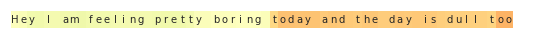

In [12]:
#map = plot_neuron_heatmap(review_text, neuron_values)
plot_neuron_heatmap(hello, neuron_values)

In [27]:
n_limit = count

In [ ]:
    cell_height=.325
    cell_width=.15
    n_limit = count
    num_chars = len(text)
    text = list(map(lambda x: x.replace('\n', '\\n'), text))
    num_chars = len(text)
    total_chars = math.ceil(num_chars/float(n_limit))*n_limit
    mask = np.array([0]*num_chars + [1]*(total_chars-num_chars))
    text = np.array(text+[' ']*(total_chars-num_chars))
    values = np.array((values+[0])*(total_chars-num_chars))

In [28]:
num_chars = len(hello)
text=hello

In [29]:
text = list(map(lambda x: x.replace('\n', '\\n'), text))

In [30]:
text

['T',
 'h',
 'i',
 's',
 ' ',
 'i',
 's',
 ' ',
 'o',
 'n',
 'e',
 ' ',
 'o',
 'f',
 ' ',
 'C',
 'r',
 'i',
 'c',
 'h',
 't',
 'o',
 'n',
 "'",
 's',
 ' ',
 'b',
 'e',
 's',
 't',
 ' ',
 'b',
 'o',
 'o',
 'k',
 's',
 '.',
 ' ',
 'T',
 'h',
 'e',
 ' ',
 'c',
 'h',
 'a',
 'r',
 'a',
 'c',
 't',
 'e',
 'r',
 's',
 ' ',
 'o',
 'f',
 ' ',
 'K',
 'a',
 'r',
 'e',
 'n',
 ' ',
 'R',
 'o',
 's',
 's',
 ',',
 ' ',
 'P',
 'e',
 't',
 'e',
 'r',
 ' ',
 'E',
 'l',
 'l',
 'i',
 'o',
 't',
 ',',
 ' ',
 'M',
 'u',
 'n',
 'r',
 'o',
 ',',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'm',
 'y',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 'l',
 'y',
 ' ',
 'd',
 'e',
 'v',
 'e',
 'l',
 'o',
 'p',
 'e',
 'd',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 't',
 'h',
 'e',
 'i',
 'r',
 ' ',
 'i',
 'n',
 't',
 'e',
 'r',
 'a',
 'c',
 't',
 'i',
 'o',
 'n',
 's',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'e',
 'x',
 'c',
 'i',
 't',
 'i',
 'n',
 'g',
 ',',
 ' ',
 'c',
 'o',
 'm',
 'p',
 'l',
 'e',
 'x'

In [31]:
num_chars = len(text)

In [32]:
total_chars = math.ceil(num_chars/float(n_limit))*n_limit

In [33]:
total_chars

832

In [34]:
mask = np.array([0]*num_chars + [1]*(total_chars-num_chars))

In [35]:
len(mask)

832

In [36]:
text = np.array(text+[' ']*(total_chars-num_chars))

In [37]:
text

array(['T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'o', 'n', 'e', ' ', 'o',
       'f', ' ', 'C', 'r', 'i', 'c', 'h', 't', 'o', 'n', "'", 's', ' ',
       'b', 'e', 's', 't', ' ', 'b', 'o', 'o', 'k', 's', '.', ' ', 'T',
       'h', 'e', ' ', 'c', 'h', 'a', 'r', 'a', 'c', 't', 'e', 'r', 's',
       ' ', 'o', 'f', ' ', 'K', 'a', 'r', 'e', 'n', ' ', 'R', 'o', 's',
       's', ',', ' ', 'P', 'e', 't', 'e', 'r', ' ', 'E', 'l', 'l', 'i',
       'o', 't', ',', ' ', 'M', 'u', 'n', 'r', 'o', ',', ' ', 'a', 'n',
       'd', ' ', 'A', 'm', 'y', ' ', 'a', 'r', 'e', ' ', 'b', 'e', 'a',
       'u', 't', 'i', 'f', 'u', 'l', 'l', 'y', ' ', 'd', 'e', 'v', 'e',
       'l', 'o', 'p', 'e', 'd', ' ', 'a', 'n', 'd', ' ', 't', 'h', 'e',
       'i', 'r', ' ', 'i', 'n', 't', 'e', 'r', 'a', 'c', 't', 'i', 'o',
       'n', 's', ' ', 'a', 'r', 'e', ' ', 'e', 'x', 'c', 'i', 't', 'i',
       'n', 'g', ',', ' ', 'c', 'o', 'm', 'p', 'l', 'e', 'x', ',', ' ',
       'a', 'n', 'd', ' ', 'f', 'a', 's', 't', '-', 'p', 'a', 'c

In [39]:
values = np.array((neuron_values+[0])*(total_chars-num_chars))

In [41]:
values = values.reshape(-1, n_limit)
text = text.reshape(-1, n_limit)
mask = mask.reshape(-1, n_limit)
num_rows = len(values)

In [56]:
cell_height=.1
cell_width=.1

In [57]:
plt.figure(figsize=(cell_width*n_limit, cell_height*num_rows))

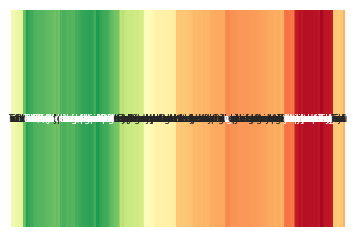

In [58]:
hmap=sns.heatmap(values, annot=text, mask=mask,fmt='', vmin=-5, vmax=5, cmap='RdYlGn',xticklabels=False, yticklabels=False, cbar=False)

In [47]:
plt.subplots_adjust()

In [59]:
plt.tight_layout()